In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
# Ruta del dataset mejorado
ruta_dataset_mejorado = "../../Limpieza/data/df_mejorado_ing_caract.csv"
df = pd.read_csv(ruta_dataset_mejorado)

In [3]:
print("Estructura del dataset mejorado:")
print(df.info())

Estructura del dataset mejorado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917885 entries, 0 to 917884
Data columns (total 39 columns):
 #   Column                                                           Non-Null Count   Dtype  
---  ------                                                           --------------   -----  
 0   AÑO                                                              917885 non-null  int64  
 1   TRIMESTRE                                                        917885 non-null  float64
 2   PROVEEDOR                                                        917885 non-null  object 
 3   CÓDIGO DANE                                                      917885 non-null  float64
 4   DEPARTAMENTO                                                     917885 non-null  object 
 5   CÓDIGO DANE.1                                                    917885 non-null  float64
 6   MUNICIPIO                                                        917885 non-null  object 
 

In [4]:
#Seleccionar variables predictoras y objetivo

columnas_predictoras = [
    'AÑO', 'TRIMESTRE', 'VELOCIDAD BAJADA', 'VELOCIDAD SUBIDA',
    'Latitud', 'Longitud', 'Tasa_Crecimiento', 'Densidad_Accesos',
    'Promedio_Movil', 'Indice_Velocidad'
]
X = df[columnas_predictoras]
y = df['No. ACCESOS FIJOS A INTERNET']

In [5]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Revisar la forma de los conjuntos
print(f"Forma de X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Forma de X_test: {X_test.shape}, y_test: {y_test.shape}")

Forma de X_train: (734308, 10), y_train: (734308,)
Forma de X_test: (183577, 10), y_test: (183577,)


In [7]:
# Entrenar el modelo XGBoost
modelo = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
modelo.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [8]:
# Hacer predicciones
y_pred = modelo.predict(X_test)

In [9]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Error cuadrático medio (MSE): 44217.48175943828
Coeficiente de determinación (R²): 0.8087407946586609


In [10]:
# Importancia de las variables
importancia = modelo.feature_importances_
variables = X.columns

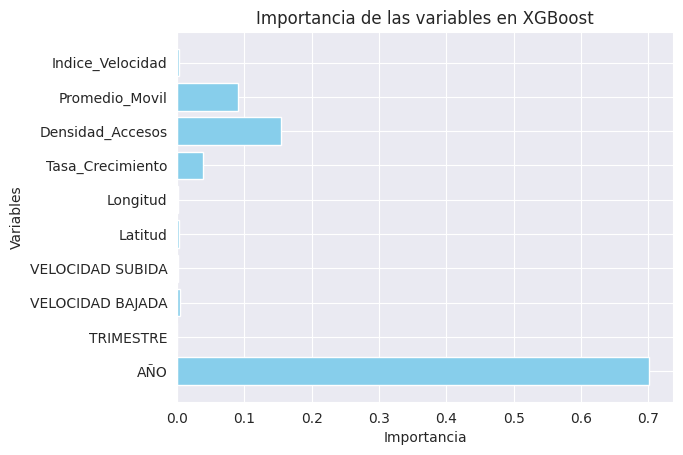

In [11]:
plt.barh(variables, importancia, color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables en XGBoost')
plt.show()

# Conclusiones del Modelo XGBoost con Nuevas Características

---

## **Desempeño del Modelo**

### **Error Cuadrático Medio (MSE):**
- **Anterior:** 303,949.16  
- **Actual:** 44,217.48  

Hubo una mejora significativa en el MSE, con una reducción de aproximadamente **85.5%**. Esto indica que el modelo con las nuevas características puede predecir con mayor precisión los accesos fijos a internet, reduciendo considerablemente el margen de error en las predicciones.

### **Coeficiente de Determinación (\(R^2\)):**
- **Anterior:** 0.217  
- **Actual:** 0.809  

El \(R^2\) muestra un incremento notable, pasando del **21.7%** al **80.9%**. Esto significa que el modelo actual puede explicar más del **80% de la variabilidad** en los datos, lo cual es una mejora significativa en comparación con el modelo anterior.

---

## **Impacto de las Nuevas Características**
La incorporación de nuevas características, como:
- **Tasa de Crecimiento**: Captura tendencias en los accesos fijos a internet.
- **Densidad de Accesos**: Relaciona los accesos con la ubicación geográfica.
- **Promedio Móvil**: Refleja comportamientos históricos de los accesos.
- **Índice de Velocidad**: Combina la velocidad de bajada y subida.

Estas características parecen haber sido clave para mejorar la capacidad predictiva del modelo.

---

## **Comparación con el Modelo Anterior**
- **Anteriormente:** El modelo se basaba únicamente en variables como año, trimestre, velocidad de bajada y subida, latitud y longitud, las cuales no eran suficientes para capturar relaciones más complejas en los datos.
- **Actualmente:** El modelo logra un desempeño significativamente superior gracias a la ingeniería de características, lo que demuestra que el enriquecimiento del dataset es esencial para mejorar el rendimiento.

---

## **Siguientes Pasos**
1. **Evaluar la Importancia de las Variables:**
   - Analizar cuáles de las nuevas características tienen mayor peso en las predicciones del modelo.
2. **Hiperparámetros:**
   - Ajustar los hiperparámetros del modelo XGBoost para optimizar aún más su desempeño.
3. **Validación Cruzada:**
   - Implementar una validación cruzada para confirmar la estabilidad del modelo.

---

La mejora en los resultados demuestra que una buena ingeniería de características puede ser incluso más importante que el modelo en sí. Esto subraya la necesidad de dedicar tiempo a analizar y transformar los datos para obtener mejores predicciones.
